# Основи роботи з data.frame-ами

---

In [2]:
?data.frame

data.frame {base},R Documentation
...,these arguments are of either the form value or tag = value. Component names are created based on the tag (if present) or the deparsed argument itself.
row.names,"NULL or a single integer or character string specifying a column to be used as row names, or a character or integer vector giving the row names for the data frame."
check.rows,if TRUE then the rows are checked for consistency of length and names.
check.names,logical. If TRUE then the names of the variables in the data frame are checked to ensure that they are syntactically valid variable names and are not duplicated. If necessary they are adjusted (by make.names) so that they are.
fix.empty.names,"logical indicating if arguments which are “unnamed” (in the sense of not being formally called as someName = arg) get an automatically constructed name or rather name """". Needs to be set to FALSE even when check.names is false if """" names should be kept."
stringsAsFactors,logical: should character vectors be converted to factors? The ‘factory-fresh’ default has been TRUE previously but has been changed to FALSE for R 4.0.0.


## Як створити data.frame?

In [80]:
df <- data.frame(id = (1:5),
                name = c("Petro", "Ivan", "Olena", "Olha", "Andriy"),
                age = sample(18:100, size = 5),
                is_active = c(T, T, F, T, F))

In [82]:
df

id,name,age,is_active
<int>,<chr>,<int>,<lgl>
1,Petro,37,TRUE
2,Ivan,70,TRUE
3,Olena,67,FALSE
4,Olha,92,TRUE
5,Andriy,68,FALSE


In [87]:
mean(df$age)

[1] 66.8

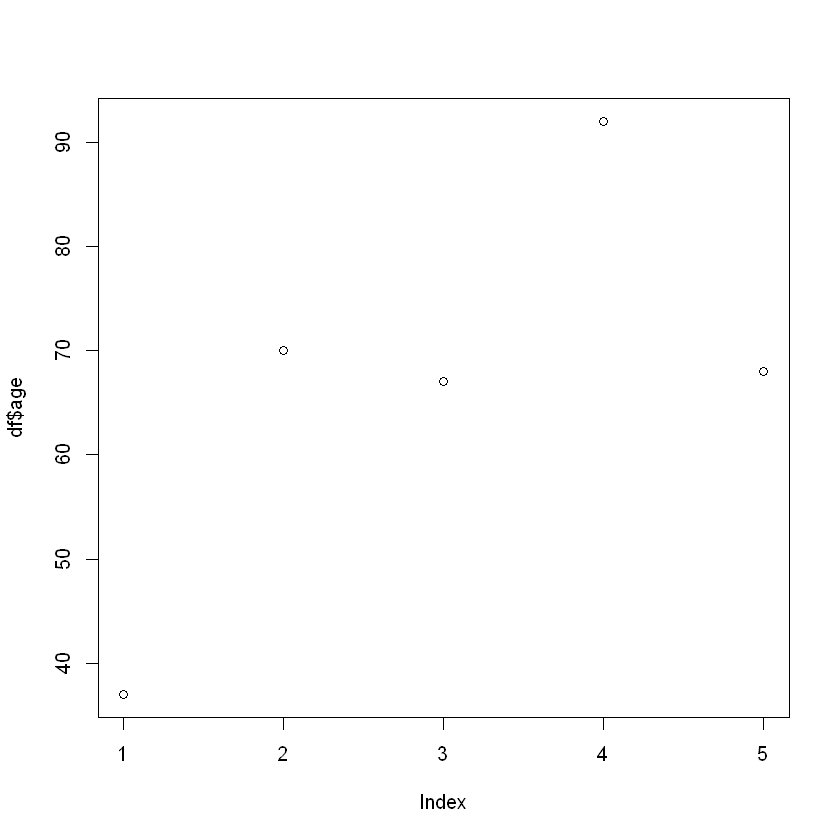

In [85]:
plot(df$age)

In [8]:
str(df)

'data.frame':	5 obs. of  4 variables:
 $ id       : int  1 2 3 4 5
 $ name     : chr  "Petro" "Ivan" "Olena" "Olha" ...
 $ age      : int  37 89 83 21 46
 $ is_active: logi  TRUE TRUE FALSE TRUE FALSE


In [10]:
nrow(df)

[1] 5

In [12]:
ncol(df)

[1] 4

In [14]:
dim(df)

[1] 5 4

In [88]:
df <- data.frame(id = (1:5),
                name = c("Petro", "Ivan", "Olena", "Olha", "Andriy"),
                age = sample(18:100, size = 5),
                is_active = c(T, T, F, T, F),
                gender = c("Male", "Male", "Female", "Female", "Unknown"))

In [89]:
df

id,name,age,is_active,gender
<int>,<chr>,<int>,<lgl>,<chr>
1,Petro,26,TRUE,Male
2,Ivan,66,TRUE,Male
3,Olena,27,FALSE,Female
4,Olha,24,TRUE,Female
5,Andriy,89,FALSE,Unknown


In [19]:
df <- data.frame(id = (1:5),
                name = c("Petro", "Ivan", "Olena", "Olha", "Andriy"),
                age = sample(18:100, size = 5),
                is_active = c(T, T, F, T, F),
                gender = c("Male", "Male", "Female", "Female", "Unknown"),
                stringsAsFactors = T)
df$name <- as.character(df$name)

In [21]:
df

id,name,age,is_active,gender
<int>,<fct>,<int>,<lgl>,<fct>
1,Petro,96,TRUE,Male
2,Ivan,95,TRUE,Male
3,Olena,80,FALSE,Female
4,Olha,34,TRUE,Female
5,Andriy,18,FALSE,Unknown


In [23]:
df$name <- as.character(df$name)

In [25]:
df

id,name,age,is_active,gender
<int>,<chr>,<int>,<lgl>,<fct>
1,Petro,96,TRUE,Male
2,Ivan,95,TRUE,Male
3,Olena,80,FALSE,Female
4,Olha,34,TRUE,Female
5,Andriy,18,FALSE,Unknown


In [27]:
a <- c(1:3)
b <- c(4,1,8)
c <- c("AAA", "BBB", "CCC")

df_abc <- data.frame(a,b,c)
df_abc

a,b,c
<int>,<dbl>,<chr>
1,4,AAA
2,1,BBB
3,8,CCC


## Іменування елементів data,frame

In [90]:
df <- data.frame(X1 = (1:5),
                X2 = c("Petro", "Ivan", "Olena", "Olha", "Andriy"),
                X3 = sample(18:100, size = 5),
                X4 = c(T, T, F, T, F),
                X5 = c("Male", "Male", "Female", "Female", "Unknown"),
                stringsAsFactors = T)
df$X2 <- as.character(df$X2)
df

X1,X2,X3,X4,X5
<int>,<chr>,<int>,<lgl>,<fct>
1,Petro,63,TRUE,Male
2,Ivan,93,TRUE,Male
3,Olena,31,FALSE,Female
4,Olha,69,TRUE,Female
5,Andriy,60,FALSE,Unknown


In [91]:
colnames(df)

[1] "X1" "X2" "X3" "X4" "X5"

In [92]:
colnames(df) <- c("Id", "FirstName", "Age", "IsActiveCustomer", "Gender")

In [93]:
df

Id,FirstName,Age,IsActiveCustomer,Gender
<int>,<chr>,<int>,<lgl>,<fct>
1,Petro,63,TRUE,Male
2,Ivan,93,TRUE,Male
3,Olena,31,FALSE,Female
4,Olha,69,TRUE,Female
5,Andriy,60,FALSE,Unknown


In [94]:
rownames(df)

[1] "1" "2" "3" "4" "5"

In [95]:
rownames(df) <- df$Id

In [96]:
df

,Id,FirstName,Age,IsActiveCustomer,Gender
,<int>,<chr>,<int>,<lgl>,<fct>
1,1,Petro,63,TRUE,Male
2,2,Ivan,93,TRUE,Male
3,3,Olena,31,FALSE,Female
4,4,Olha,69,TRUE,Female
5,5,Andriy,60,FALSE,Unknown


In [98]:
df$Id <- NULL

In [99]:
df

,FirstName,Age,IsActiveCustomer,Gender
,<chr>,<int>,<lgl>,<fct>
1,Petro,63,TRUE,Male
2,Ivan,93,TRUE,Male
3,Olena,31,FALSE,Female
4,Olha,69,TRUE,Female
5,Andriy,60,FALSE,Unknown


## Розширення data.frame-ів

In [100]:
car <- c("Ford", NA, "Tesla", NA, "Ford")

In [101]:
df <- cbind(df, car)

In [102]:
df

,FirstName,Age,IsActiveCustomer,Gender,car
,<chr>,<int>,<lgl>,<fct>,<chr>
1,Petro,63,TRUE,Male,Ford
2,Ivan,93,TRUE,Male,NA
3,Olena,31,FALSE,Female,Tesla
4,Olha,69,TRUE,Female,NA
5,Andriy,60,FALSE,Unknown,Ford


In [104]:
df$HasCar <- !is.na(df$car)

In [57]:
df

,FirstName,Age,IsActiveCustomer,Gender,car,HasCar
,<chr>,<int>,<lgl>,<fct>,<chr>,<lgl>
1,Petro,31,TRUE,Male,Ford,TRUE
2,Ivan,56,TRUE,Male,NA,FALSE
3,Olena,48,FALSE,Female,Tesla,TRUE
4,Olha,34,TRUE,Female,NA,FALSE
5,Andriy,97,FALSE,Unknown,Ford,TRUE


In [106]:
df[df$HasCar, 1:4]

,FirstName,Age,IsActiveCustomer,Gender
,<chr>,<int>,<lgl>,<fct>
1,Petro,63,TRUE,Male
3,Olena,31,FALSE,Female
5,Andriy,60,FALSE,Unknown


In [107]:
new_client <- c("Oksana", 24, T, "Female", "Porshe", NA) 

In [108]:
df <- rbind(df, new_client)
df

FirstName,Age,IsActiveCustomer,Gender,car,HasCar
<chr>,<chr>,<chr>,<fct>,<chr>,<chr>
Petro,63,TRUE,Male,Ford,TRUE
Ivan,93,TRUE,Male,NA,FALSE
Olena,31,FALSE,Female,Tesla,TRUE
Olha,69,TRUE,Female,NA,FALSE
Andriy,60,FALSE,Unknown,Ford,TRUE
Oksana,24,TRUE,Female,Porshe,NA


In [109]:
#df <- df[-nrow(df), ]
#df

In [110]:
df$HasCar <- !is.na(df$car)

In [111]:
df

FirstName,Age,IsActiveCustomer,Gender,car,HasCar
<chr>,<chr>,<chr>,<fct>,<chr>,<lgl>
Petro,63,TRUE,Male,Ford,TRUE
Ivan,93,TRUE,Male,NA,FALSE
Olena,31,FALSE,Female,Tesla,TRUE
Olha,69,TRUE,Female,NA,FALSE
Andriy,60,FALSE,Unknown,Ford,TRUE
Oksana,24,TRUE,Female,Porshe,TRUE


In [113]:
df$Id <- c(1: nrow(df))
df

FirstName,Age,IsActiveCustomer,Gender,car,HasCar,Id
<chr>,<chr>,<chr>,<fct>,<chr>,<lgl>,<int>
Petro,63,TRUE,Male,Ford,TRUE,1
Ivan,93,TRUE,Male,NA,FALSE,2
Olena,31,FALSE,Female,Tesla,TRUE,3
Olha,69,TRUE,Female,NA,FALSE,4
Andriy,60,FALSE,Unknown,Ford,TRUE,5
Oksana,24,TRUE,Female,Porshe,TRUE,6


In [115]:
df_1 <- df[, c("Id", "FirstName", "Age", "Gender")]
df_1

Id,FirstName,Age,Gender
<int>,<chr>,<chr>,<fct>
1,Petro,63,Male
2,Ivan,93,Male
3,Olena,31,Female
4,Olha,69,Female
5,Andriy,60,Unknown
6,Oksana,24,Female


In [116]:
df_2 <- df[, c("Id", "car", "HasCar", "IsActiveCustomer")]
df_2

Id,car,HasCar,IsActiveCustomer
<int>,<chr>,<lgl>,<chr>
1,Ford,TRUE,TRUE
2,NA,FALSE,TRUE
3,Tesla,TRUE,FALSE
4,NA,FALSE,TRUE
5,Ford,TRUE,FALSE
6,Porshe,TRUE,TRUE
